Лабораторная работа №4
Интервальные оценки.
Вариант 10. Y = ln(x); a = 1; b = 5; y0 = 1

Задание 1. Доверительный интервал для математического ожидания СВ.

1.1. В соответствии с вариантом (см. задание 1) сформировать выборку из 20 случайных чисел. Найти точечную оценку математического ожидания случайной величины.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

n = 20 #задается вручную

# найдены в 1-й ЛР
a = 1.
b = 5.

# формируем выборку
def get_sample(n):
    sample_X = []
    sample_Y = []
    uniform_rv = sts.uniform()
    sample_xi = uniform_rv.rvs(size=n)

    for i in range(n):
        x = sample_xi[i] * (b - a) + a
        sample_X.append(x)
        y = np.log(x)
        sample_Y.append(y)
    return sample_Y

sample_Y = get_sample(n)

In [27]:
EV = sum(sample_Y) / n
print(EV)

1.0566009415705355


1.2. Найти точечную оценку дисперсии случайной величины.

In [28]:
def empirical_D(sample_Y, EV):
    D0 = 0.
    for i in sample_Y:
        D0 += (i - EV) ** 2
    D0 = D0 / (len(sample_Y) - 1)
    return D0
D0 = empirical_D(sample_Y, EV)
print(D0)

0.1604567935762596


1.3. Найти доверительный интервал для оценки математического ожидания случайной величины для различных уровней значимости.

In [29]:
gammas = [0.9, 0.95, 0.98, 0.99]
t_rv = sts.t(19)
arr = t_rv.rvs(1000000)

ts = []
for i in gammas:
    tmp = sts.mstats.mquantiles(arr, prob=[1-(1-i)/2])
    ts.append(tmp[0])
    
#ts = [1.73, 2.093, 2.54, 2.861]
intervals = []

for i in ts:
    intervals.append((EV - np.sqrt(D0) * i / np.sqrt(n - 1), EV + np.sqrt(D0) * i / np.sqrt(n - 1)))
    
intervals

[(0.8977255769735277, 1.2154763061675433),
 (0.864192683782066, 1.249009199359005),
 (0.8229218123300879, 1.2902800708109832),
 (0.7936272438186297, 1.3195746393224415)]

1.4. Построить график зависимости величины доверительного интервала от уровня значимости.

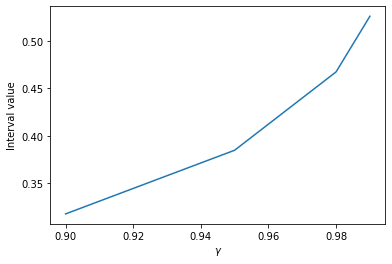

In [30]:
plt.plot(gammas, [i[1] - i[0] for i in intervals])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

1.5. Найти теоретическое значение дисперсии случайной величины по известной плотности распределения ( задание 2, п.3).

In [31]:
import scipy.integrate as integrate
DY = integrate.quad(lambda x: ((x ** 2 * np.exp(x)) / 4), np.log(1), np.log(5))[0] - (integrate.quad(lambda x: ((x * np.exp(x)) / 4), np.log(1), np.log(5))[0])**2 

print(DY)

0.19053425188117634


1.6. Найти доверительный интервал для оценки математического ожидания случайной величины при известной дисперсии для различных уровней значимости.

In [32]:
intervals2 = []

for i in ts:
    intervals2.append((EV - np.sqrt(DY) * i / np.sqrt(n - 1), EV + np.sqrt(DY) * i / np.sqrt(n - 1)))
    
intervals2

[(0.8834742479026161, 1.229727635238455),
 (0.8469334101076381, 1.266268473033433),
 (0.8019604872293904, 1.3112413959116807),
 (0.7700381574101542, 1.3431637257309168)]

1.7. Построить график зависимости величины доверительного интервала от уровня значимости.

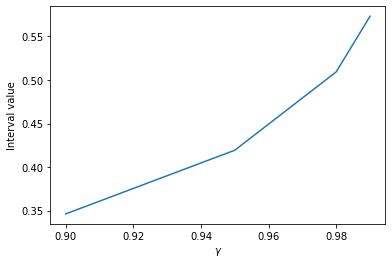

In [33]:

plt.plot(gammas, [i[1] - i[0] for i in intervals2])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

1.8. Сравнить результаты, полученные по п.п. 1.4, 1.7.

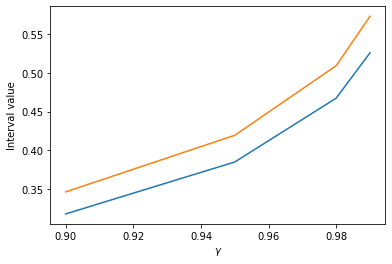

In [34]:
plt.plot(gammas, [i[1] - i[0] for i in intervals])
plt.plot(gammas, [i[1] - i[0] for i in intervals2])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

1.9. Повторить п.п. 1.2 – 1.8. для различного объема выборки: n = 30, 50, 70, 100, 150.

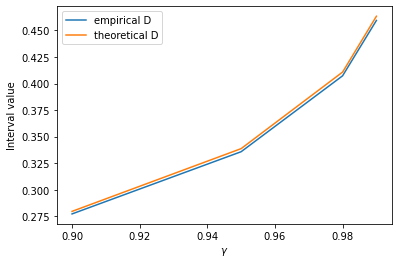

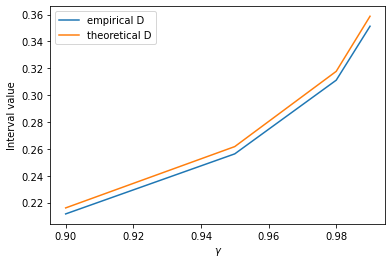

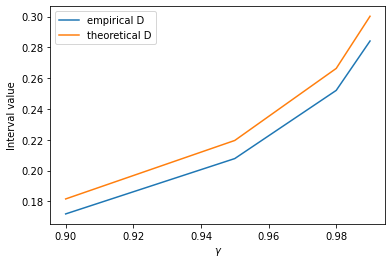

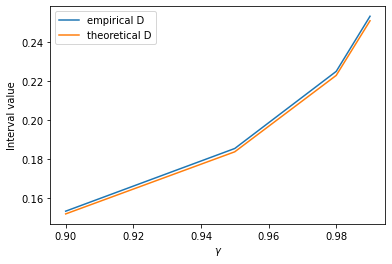

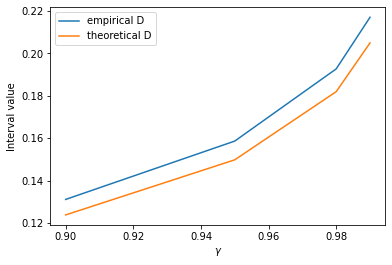

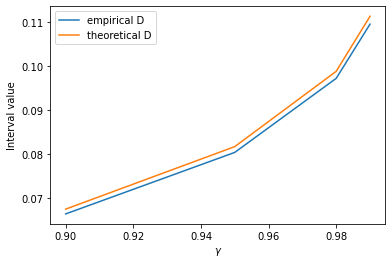

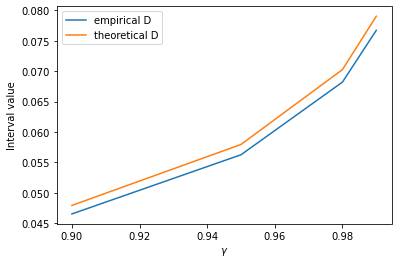

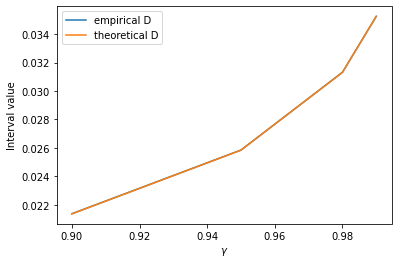

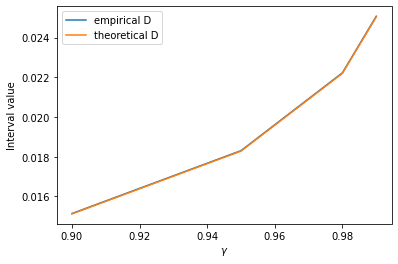

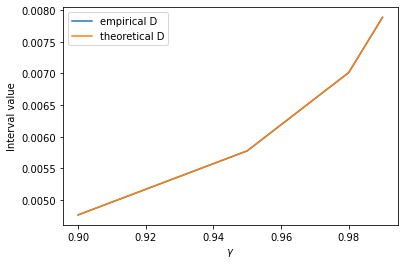

In [35]:
# напишем функцию, объединяющую шаги
def ev_routine(n):
    sample_Y = get_sample(n)
    EV = sum(sample_Y) / n
    D0 = empirical_D(sample_Y, EV)
    gammas = [0.9, 0.95, 0.98, 0.99]
    t_rv = sts.t(19)
    arr = t_rv.rvs(1000000)
    
    ts = []
    for i in gammas:
        tmp = sts.mstats.mquantiles(arr, prob=[1-(1-i)/2])
        ts.append(tmp[0])
        
    intervals = []

    for i in ts:
        intervals.append((EV - np.sqrt(D0) * i / np.sqrt(n - 1), EV + np.sqrt(D0) * i / np.sqrt(n - 1)))
    
    intervals2 = []

    for i in ts:
        intervals2.append((EV - np.sqrt(DY) * i / np.sqrt(n - 1), EV + np.sqrt(DY) * i / np.sqrt(n - 1)))
    
    plt.plot(gammas, [i[1] - i[0] for i in intervals], label="empirical D")
    plt.plot(gammas, [i[1] - i[0] for i in intervals2], label='theoretical D')
    plt.xlabel("$\gamma$")
    plt.ylabel("Interval value")
    plt.legend(loc='upper left')
    plt.show()
    return intervals2

evs = [30, 50, 70, 100, 150, 500, 1000, 5000, 10000, 100000]
ints = []

for i in evs:
    ints.append(ev_routine(i))

1.10. Построить графики зависимости величины доверительного интервала от объема выборки.

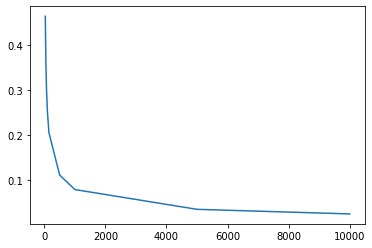

In [36]:

# для уровня 0.99
plt.plot(evs[:-1], [(i[-1][1] - i[-1][0]) for i in ints[:-1]])

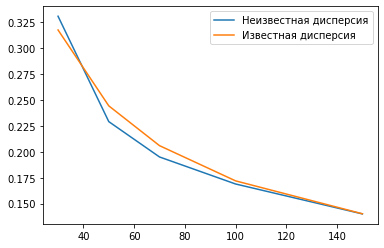

In [37]:
y_plot_e = []
len_y_plot_e = []
y_plot_t = []
len_y_plot_t = []
for i, n in enumerate(n_list):
    y_plot_e.append(e_get_intervals(n, mx_list[i], dx_list[i], alpha=0.05))
    left, right = y_plot_e[-1]
    len_y_plot_e.append(right - left)
    y_plot_t.append(t_get_intervals(n, mx_list[i], t_dx, alpha=0.05))
    left, right = y_plot_t[-1]
    len_y_plot_t.append(right - left)
plt.plot(n_list, len_y_plot_e)
plt.plot(n_list, len_y_plot_t)
plt.legend(('Неизвестная дисперсия', 'Известная дисперсия'))
plt.show()

Задание 2. Доверительный интервал для дисперсии СВ.

2.1. В соответствии с вариантом (см. задание 1) сформировать выборку из 20 случайных чисел. Найти точечную оценку дисперсии случайной величины.

In [38]:
n = 20
sample_Y = get_sample(n)
EV = sum(sample_Y) / n
D0 = empirical_D(sample_Y, EV)
print(D0)

0.21552674048143844


2.2. Найти точечную оценку математического ожидания случайной величины.

In [39]:
print(EV)

1.0471256843495234


2.3. Найти доверительный интервал для оценки дисперсии случайной величины для различных уровней значимости.

In [40]:
gammas = [0.9, 0.95, 0.98, 0.99]

chi2_rv = sts.chi2(19)
arr = chi2_rv.rvs(100000)

chip = []
chim = []
for i in gammas:
    tmp = sts.mstats.mquantiles(arr, prob=[(1-i)/2, (1+i)/2])
    chip.append(tmp[0])
    chim.append(tmp[1])

intervals = []

for i in range(len(chim)):
    intervals.append(((n-1) * D0 / chim[i], (n - 1) * D0 / chip[i]))
    
intervals

[(0.1358193363564536, 0.4039161883685434),
 (0.12432531137204392, 0.45901876110524015),
 (0.1130045301960588, 0.5387687579786529),
 (0.10599091465153673, 0.5994045571304493)]

2.4. Построить график зависимости величины доверительного интервала от уровня значимости.

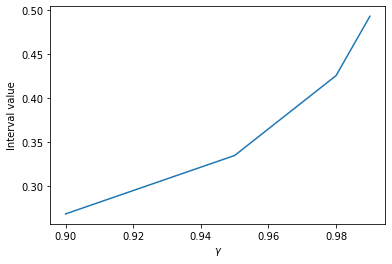

In [41]:
plt.plot(gammas, [i[1] - i[0] for i in intervals])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()


2.5. Найти теоретическое значение математического ожидания случайной величины по известной плотности распределения ( задание 2, п.3).

In [42]:
import scipy.integrate as integrate
MY = integrate.quad(lambda x: (x * np.exp(x)/ 4), np.log(1), np.log(5))[0]
print(MY)

1.0117973905426254


2.6. Найти доверительный интервал для оценки дисперсии случайной величины при известном математическом ожидании для различных уровней значимости.

In [43]:
intervals2 = []

for i in range(len(chim)):
    intervals2.append((n * empirical_D(sample_Y, MY) / chim[i], n * empirical_D(sample_Y, MY) / chip[i]))
    
intervals2

[(0.14383920475784517, 0.4277666559294054),
 (0.1316664798898243, 0.48612292871928614),
 (0.11967722854112331, 0.5705820082394996),
 (0.11224947260102901, 0.6347982337330531)]

2.7. Построить график зависимости величины доверительного интервала от уровня значимости.

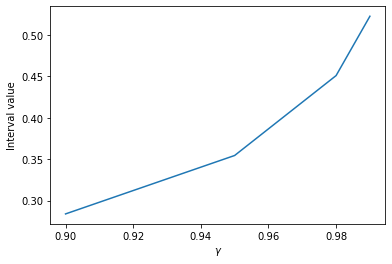

In [44]:
plt.plot(gammas, [i[1] - i[0] for i in intervals2])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

2.8. Сравнить результаты, полученные по п.п. 2.4, 2.7.

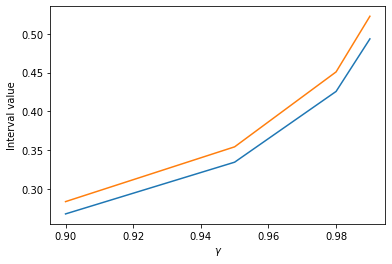

In [45]:
plt.plot(gammas, [i[1] - i[0] for i in intervals])
plt.plot(gammas, [i[1] - i[0] for i in intervals2])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

2.9. Повторить п.п. 2.2 – 2.8. для различного объема выборки: n = 30, 50, 70, 100, 150.

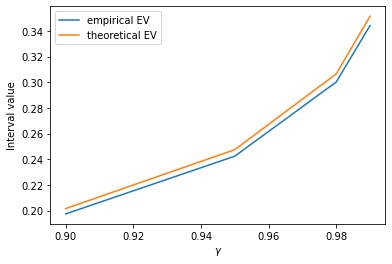

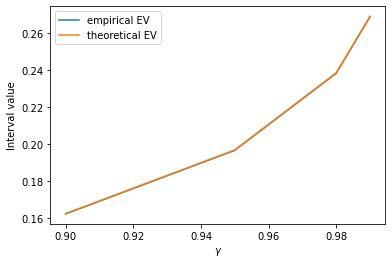

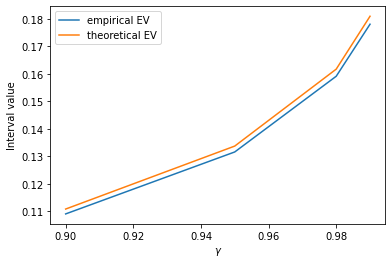

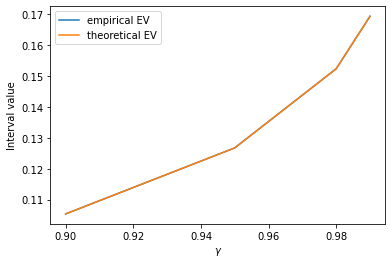

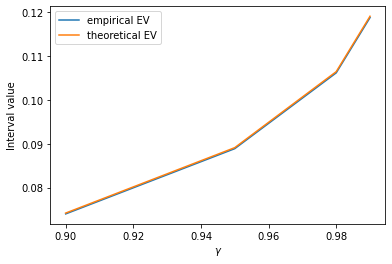

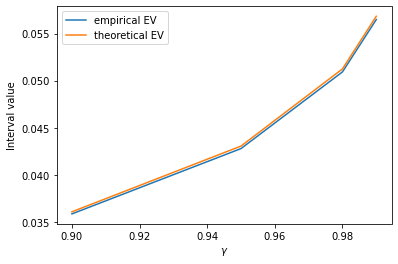

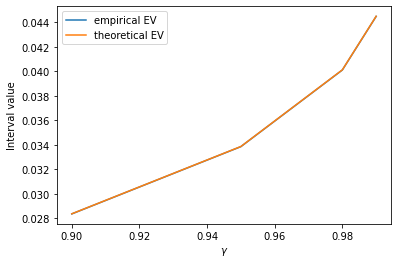

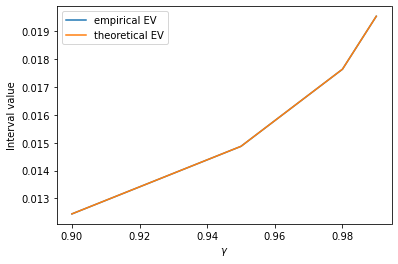

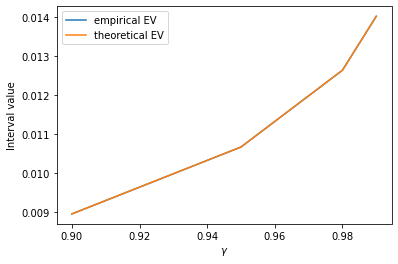

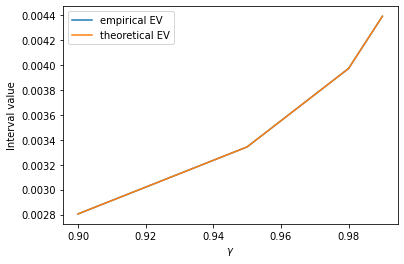

In [46]:
# напишем функцию, объединяющую шаги
def d_routine(n):
    sample_Y = get_sample(n)
    EV = sum(sample_Y) / n
    D0 = empirical_D(sample_Y, EV)
    gammas = [0.9, 0.95, 0.98, 0.99]
    chi2_rv = sts.chi2(n - 1)
    arr = chi2_rv.rvs(100000)

    chip = []
    chim = []
    for i in gammas:
        tmp = sts.mstats.mquantiles(arr, prob=[(1-i)/2, (1+i)/2])
        chip.append(tmp[0])
        chim.append(tmp[1])
    
    intervals = []

    for i in range(len(chim)):
        intervals.append((n * D0 / chim[i], n * D0 / chip[i]))
    
    intervals2 = []
    
    for i in range(len(chim)):
        intervals2.append((n * empirical_D(sample_Y, MY) / chim[i], n * empirical_D(sample_Y, MY) / chip[i]))

    plt.plot(gammas, [i[1] - i[0] for i in intervals], label="empirical EV")
    plt.plot(gammas, [i[1] - i[0] for i in intervals2], label='theoretical EV')
    plt.xlabel("$\gamma$")
    plt.ylabel("Interval value")
    plt.legend(loc='upper left')
    plt.show()
    return intervals2
    
evs = [30, 50, 70, 100, 150, 500, 1000, 5000, 10000, 100000]
ints = []

for i in evs:
    ints.append(d_routine(i))    

2.10. Построить графики зависимости величины доверительного интервала от объема выборки.

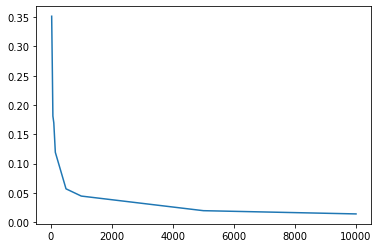

In [47]:

# для уровня 0.99
plt.plot(evs[:-1], [(i[-1][1] - i[-1][0]) for i in ints[:-1]])

Размер выборки: 30
Мат ожидание: 0.9875066666666666
Дисперсия: 0.23778913926436776
Размер выборки: 50
Мат ожидание: 0.9828500000000002
Дисперсия: 0.16455735316326528
Размер выборки: 70
Мат ожидание: 1.0024542857142857
Дисперсия: 0.24612198135817806
Размер выборки: 100
Мат ожидание: 1.001065
Дисперсия: 0.18855848815656573
Размер выборки: 150
Мат ожидание: 1.0613233333333334
Дисперсия: 0.17572419683445184


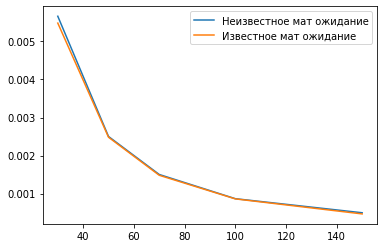

In [48]:
from random import uniform
from scipy.stats import t, chi2, norm
a = 1.
b = 5.
def Y(x):
    return np.log(x)

A = 1
B = 5

t_mx = 1.0118
t_dx = 0.1905
t_dx
#вбить подсчеты с листика

arrange = np.arange(0.0, 1.01, 0.01)[1:-1]

# известная дисперсия
def t_get_intervals(n, mx, disp, alpha=None):
    intervals = []
    if alpha is None:
        for i in arrange:
            cof = np.sqrt(disp) * norm.ppf(1 - i / 2) / np.sqrt(n - 1)
            intervals.append((mx - cof, mx + cof))
        return intervals
    else:
        cof = np.sqrt(disp) * norm.ppf(1 - alpha / 2) / np.sqrt(n - 1)
        return mx - cof, mx + cof

def get_x_values(n):
    X = sorted(round(uniform(0, 1) * (b - a) + a, 4) for _ in range(n))
    x_list = sorted([round(Y(X[i]), 4) for i in range(n)])
    return x_list

def e_dx_intervals(x_list, n, mx, alpha=None):
    intervals = []
    disper = disp(x_list, n, mx)
    if alpha is None:
        for i in reversed(arrange):
            left = n * disper / chi2.isf((1 - i) / 2, n - 1)
            right = n * disper / chi2.isf((1 + i) / 2, n - 1)
            intervals.append((left, right))
        return intervals
    else:
        left = n * disper / chi2.isf((1 - alpha) / 2, n - 1)
        right = n * disper / chi2.isf((1 + alpha) / 2, n - 1)
        return left, right
    
def e_get_intervals(n, mx, disp, alpha=None):
    intervals = []
    if alpha is None:
        for i in arrange:
            cof = np.sqrt(disp) * t.ppf(1 - i / 2, n - 1) / np.sqrt(n - 1)
            intervals.append((mx - cof, mx + cof))
        return intervals
    else:
        cof = np.sqrt(disp) * t.ppf(1 - alpha / 2, n - 1) / np.sqrt(n - 1)
        return mx - cof, mx + cof    
    
def mat_exp(x_list, n):
    return sum(x_list) / n    
    
def disp(x_list, n, mx):
     return 1 / (n - 1) * sum((x - mx)**2 for x in x_list)   
    
# известнаое мат ожидание
def t_dx_intervals(x_list, n, mx, alpha=None):
    intervals = []
    disper = disp(x_list, n, mx)
    if alpha is None:
        for i in reversed(arrange):
            left = n * disper / chi2.isf((1 - i) / 2, n)
            right = n * disper / chi2.isf((1 + i) / 2, n)
            intervals.append((left, right))
        return intervals
    else:
        left = n * disper / chi2.isf((1 - alpha) / 2, n)
        right = n * disper / chi2.isf((1 + alpha) / 2, n)
        return left, right

# неизвестное мат ожидание
def e_dx_intervals(x_list, n, mx, alpha=None):
    intervals = []
    disper = disp(x_list, n, mx)
    if alpha is None:
        for i in reversed(arrange):
            left = n * disper / chi2.isf((1 - i) / 2, n - 1)
            right = n * disper / chi2.isf((1 + i) / 2, n - 1)
            intervals.append((left, right))
        return intervals
    else:
        left = n * disper / chi2.isf((1 - alpha) / 2, n - 1)
        right = n * disper / chi2.isf((1 + alpha) / 2, n - 1)
        return left, right    
    
n_list = [30, 50, 70, 100, 150]
mx_list = []
dx_list = []
e_intervals_list = []
t_intervals_list = []
len_intervals_e = []
len_intervals_t = []
for n in n_list:
    print(f"Размер выборки: {n}")
    x_list = get_x_values(n)
    mx_list.append(mat_exp(x_list, n))
    dx_list.append(disp(x_list, n, mx_list[-1]))
    e_intervals_list.append(e_get_intervals(n, mx_list[-1], dx_list[-1]))
    t_intervals_list.append(t_get_intervals(n, mx_list[-1], t_dx))
    print(f"Мат ожидание: {mx_list[-1]}")
    print(f"Дисперсия: {dx_list[-1]}")
    x_plot = arrange[:]
    len_intervals_e.append([j - i for i, j in e_intervals_list[-1]])
    len_intervals_t.append([j - i for i, j in t_intervals_list[-1]])
n = 20
x_list = get_x_values(n)        
n_list = [30, 50, 70, 100, 150]
y_plot_e = []
len_y_plot_e = []
y_plot_t = []
len_y_plot_t = []
for i, n in enumerate(n_list):
    y_plot_e.append(e_dx_intervals(x_list, n, mx_list[i], alpha=0.05))
    left, right = y_plot_e[-1]
    len_y_plot_e.append(right - left)
    y_plot_t.append(t_dx_intervals(x_list, n, t_mx, alpha=0.05))
    left, right = y_plot_t[-1]
    len_y_plot_t.append(right - left)
plt.plot(n_list, len_y_plot_e)
plt.plot(n_list, len_y_plot_t)
plt.legend(('Неизвестное мат ожидание', 'Известное мат ожидание'))
plt.show()